In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset
df = pd.read_csv('/content/Dry_Eye_Dataset.csv')

# Display first few rows of the dataset
df.head()


,Ge0der,Age,Sleep duratio0,Sleep qualit1,Stress level,Blood pressure,Heart rate,Dail1 steps,Ph1sical activit1,Height,...,S1oki0g,1edical issue,O0goi0g 1edicatio0,S1art device be0ore bed,Average scree0 ti1e,Blue-light 0ilter,Disco10ort E1e-strai0,Red0ess i0 e1e,Itchi0ess/Irritatio0 i0 e1e,Dr1 E1e Disease
0,0,24,9.5,2,1,137/89,67,3000,31,161,...,0,1,1,0,8.7,0,1,1,0,1
1,1,39,9.6,2,3,108/64,60,12000,74,164,...,0,1,1,0,9.6,1,0,0,1,1
2,0,45,5.4,1,5,134/81,95,12000,93,179,...,0,0,0,1,4.0,0,1,0,0,0
3,0,45,5.4,4,5,110/90,78,19000,32,160,...,0,1,0,0,7.6,0,1,0,1,0
4,0,42,5.7,3,2,99/67,72,4000,173,179,...,0,1,0,0,3.5,0,1,1,0,1


In [3]:
correct_column_names = {
    'Ge0der': 'Gender',
    'Sleep duratio0': 'Sleep duration',
    'Sleep qualit1': 'Sleep quality',
    'Stress level': 'Stress level',
    'Blood pressure': 'Blood pressure',
    'Dail1 steps': 'Daily steps',
    'Ph1sical activit1': 'Physical activity',
    '0eel sleep1 duri0g da1': 'Feel sleepy during day',
    'Ca00ei0e co0su1ptio0': 'Caffeine consumption',
    'Alcohol co0su1ptio0': 'Alcohol consumption',
    'S1oki0g': 'Smoking',
    '1edical issue': 'Medical issue',
    'O0goi0g 1edicatio0': 'Ongoing medication',
    'S1art device be0ore bed': 'Smart device before bed',
    'Average scree0 ti1e': 'Average screen time',
    'Blue-light 0ilter': 'Blue-light filter',
    'Disco10ort E1e-strai0': 'Discomfort Eye-strain',
    'Red0ess i0 e1e': 'Redness in eye',
    'Itchi0ess/Irritatio0 i0 e1e': 'Itchiness/Irritation in eye',
    'Dr1 E1e Disease': 'Dry Eye Disease'
}

df.rename(columns=correct_column_names, inplace=True)


In [4]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood pressure'].str.split('/', expand=True).astype(float)

# Drop original 'Blood pressure' column
df.drop(columns=['Blood pressure'], inplace=True)


In [5]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic_BP,Diastolic_BP
0,0,24,9.5,2,1,67,3000,31,161,69,...,1,0,8.7,0,1,1,0,1,137.0,89.0
1,1,39,9.6,2,3,60,12000,74,164,87,...,1,0,9.6,1,0,0,1,1,108.0,64.0
2,0,45,5.4,1,5,95,12000,93,179,94,...,0,1,4.0,0,1,0,0,0,134.0,81.0
3,0,45,5.4,4,5,78,19000,32,160,77,...,0,0,7.6,0,1,0,1,0,110.0,90.0
4,0,42,5.7,3,2,72,4000,173,179,99,...,0,0,3.5,0,1,1,0,1,99.0,67.0


In [6]:
# Check for any missing values
df.isnull().sum()



,0
Gender,0
Age,0
Sleep duration,0
Sleep quality,0
Stress level,0
Heart rate,0
Daily steps,0
Physical activity,0
Height,0
Weight,0


In [7]:
df.columns

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight',
       'Sleep disorder', 'Wake up duri0g 0ight', 'Feel sleepy during day',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking',
       'Medical issue', 'Ongoing medication', 'Smart device before bed',
       'Average screen time', 'Blue-light filter', 'Discomfort Eye-strain',
       'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease',
       'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

In [9]:
       # Define feature columns and target variable
features = ['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight',
       'Sleep disorder', 'Wake up duri0g 0ight', 'Feel sleepy during day',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking',
       'Medical issue', 'Ongoing medication', 'Smart device before bed',
       'Average screen time', 'Blue-light filter', 'Discomfort Eye-strain',
       'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease',
       'Systolic_BP', 'Diastolic_BP']

target = 'Dry Eye Disease'

X = df[features]
y = df[target]




In [10]:
print(df.dtypes)  # Check if any columns are still non-numeric


Gender                           int64
Age                              int64
Sleep duration                 float64
Sleep quality                    int64
Stress level                     int64
Heart rate                       int64
Daily steps                      int64
Physical activity                int64
Height                           int64
Weight                           int64
Sleep disorder                   int64
Wake up duri0g 0ight             int64
Feel sleepy during day           int64
Caffeine consumption             int64
Alcohol consumption              int64
Smoking                          int64
Medical issue                    int64
Ongoing medication               int64
Smart device before bed          int64
Average screen time            float64
Blue-light filter                int64
Discomfort Eye-strain            int64
Redness in eye                   int64
Itchiness/Irritation in eye      int64
Dry Eye Disease                  int64
Systolic_BP              

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


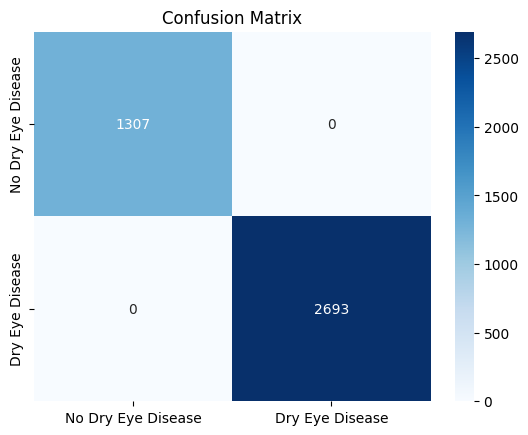

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dry Eye Disease', 'Dry Eye Disease'],
            yticklabels=['No Dry Eye Disease', 'Dry Eye Disease'])
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00      2693

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [18]:
from keras.models import Sequential
from keras.layers import Dense

# Build Neural Network model
model_nn = Sequential()
model_nn.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))
model_nn.add(Dense(units=16, activation='relu'))
model_nn.add(Dense(units=1, activation='sigmoid'))  # Binary classification (Dry Eye Disease or not)

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test_scaled, y_test)
print(f'Neural Network Accuracy: {accuracy * 100:.2f}%')

# Predictions
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5)

# Classification Report
print(classification_report(y_test, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8516 - loss: 0.3699 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 9.4135e-04
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 7.3246e-04 - val_accuracy: 1.0000 - val_loss: 3.6875e-04
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0073e-04 - val_accuracy: 1.0000 - val_loss: 1.8847e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.6134e-04 - val_accuracy: 1.0000 - val_loss: 1.0921e-04
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 9.5104e-05 - val_accuracy: 1.0000 - val_loss: 6.8567e-05
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.0439e-05 - val_accuracy: 1.0000 - val_loss: 4.5327e-05
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 

NameError: name 'history' is not defined